In [68]:
import qiskit
%matplotlib inline
 
circuit = qiskit.QuantumCircuit (2, 2) # QuantuMCircuit (Qubits, Classical Bits)

circuit.h (0)
circuit.cx (0, 1)
circuit.measure ([0, 1], [0, 1])

In [69]:
circuit.draw ()

┌───┐     ┌─┐   
q_0: |0>┤ H ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

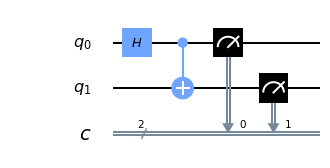

In [70]:
circuit.draw (output = 'mpl')

In [71]:
from qiskit import IBMQ

IBMQ.save_account(open("token.txt", "r").read())

configrc.store_credentials:WARNING:2020-04-01 21:53:11,916: Credentials already present. Set overwrite=True to overwrite.


In [72]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-04-01 21:53:13,128: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [73]:
provider = IBMQ.get_provider("ibm-q")
    
def list_backends ():    

    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().quibits())
        except:
            qubit_count = "simulated"

        print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
        
list_backends()

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 2 queued and simulated qubits
ibmq_16_melbourne has 7 queued and simulated qubits
ibmq_vigo has 2 queued and simulated qubits
ibmq_ourense has 2 queued and simulated qubits
ibmq_london has 7 queued and simulated qubits
ibmq_burlington has 1 queued and simulated qubits
ibmq_essex has 2 queued and simulated qubits
ibmq_armonk has 2 queued and simulated qubits


In [74]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend ("ibmq_burlington")
job = qiskit.execute (circuit, backend = backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


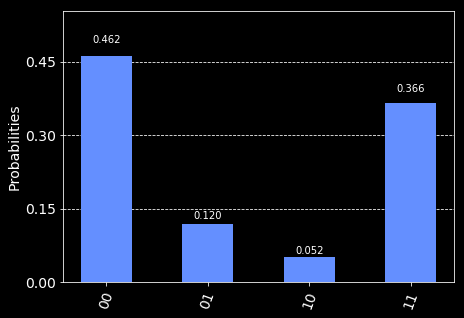

In [75]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])